In [1]:
import os
import numpy as np
import pandas as pd
from scroutines.config_plots import *

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt185/proc/r1-v1'
# n5dir = '/data/qlyu/v1/data/easifish/lt186/r1/stitching/export.n5'
f1 = os.path.join(ddir, 'roi.csv')
f2 = os.path.join(ddir, 'spotcount.csv') #_intn.csv')

In [3]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df  = df1.join(df2)

In [4]:
amin, amax = 500, 5000
cond = ((df['area'] < amax) & (df['area'] > amin))
df = df[cond]

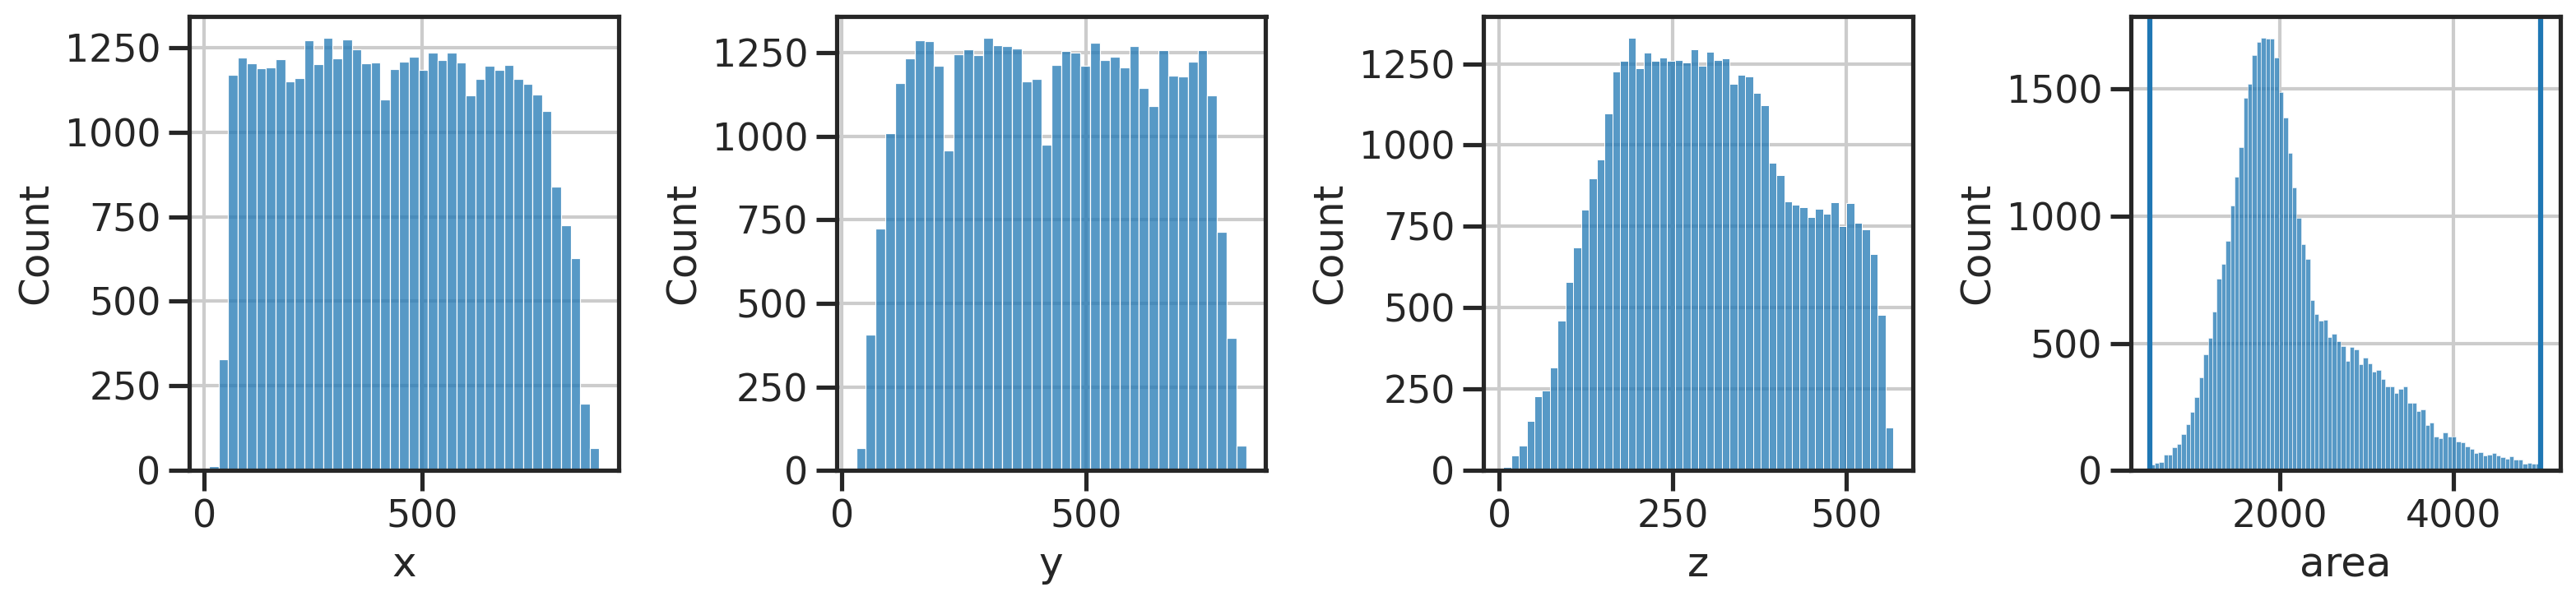

In [5]:
# cell level stats
fig, axs = plt.subplots(1,4,figsize=(4*4,1*4))
ax = axs[0]
sns.histplot(df['x'].values, ax=ax)
ax.set_xlabel('x')
ax = axs[1]
sns.histplot(df['y'].values, ax=ax)
ax.set_xlabel('y')
ax = axs[2]
sns.histplot(df['z'].values, ax=ax)
ax.set_xlabel('z')
ax = axs[3]
sns.histplot(df['area'].values, ax=ax)
ax.set_xlabel('area')
ax.axvline(amin)
ax.axvline(amax)
fig.tight_layout()
plt.show()

In [6]:
channels = [
    'r1_c0',  'r1_c2',
]
genes = [
    'RL (Cre)',
    'LM (FlpO)',
]

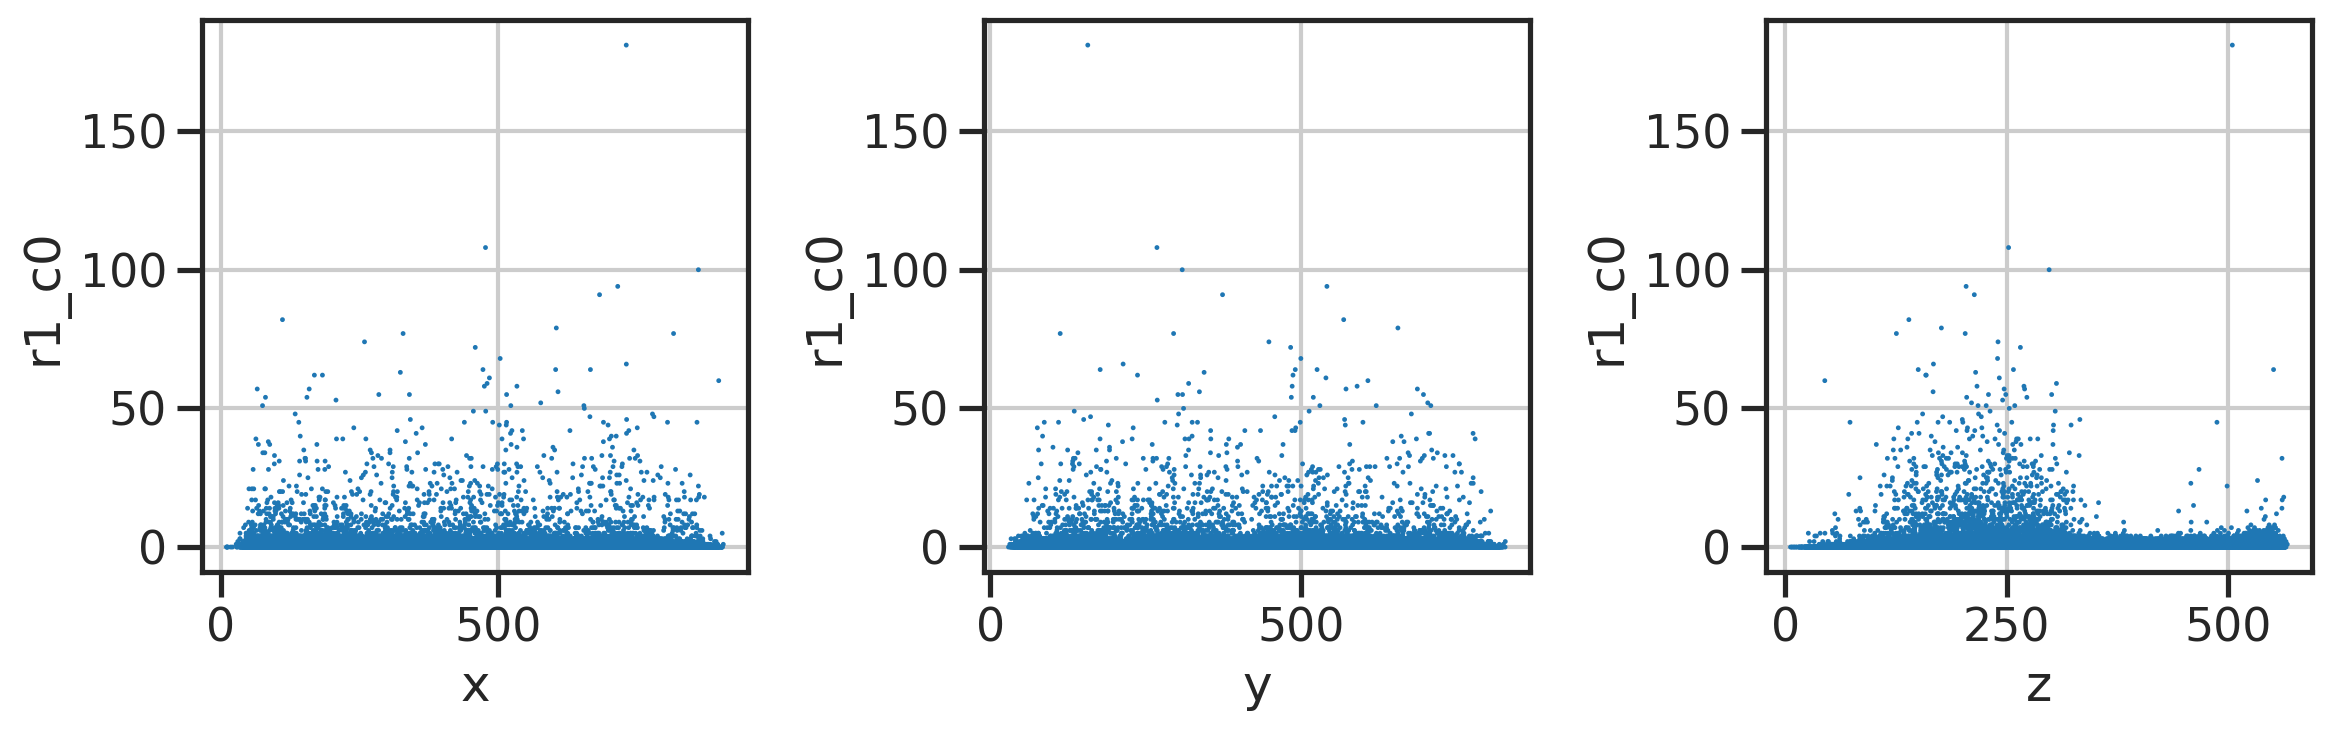

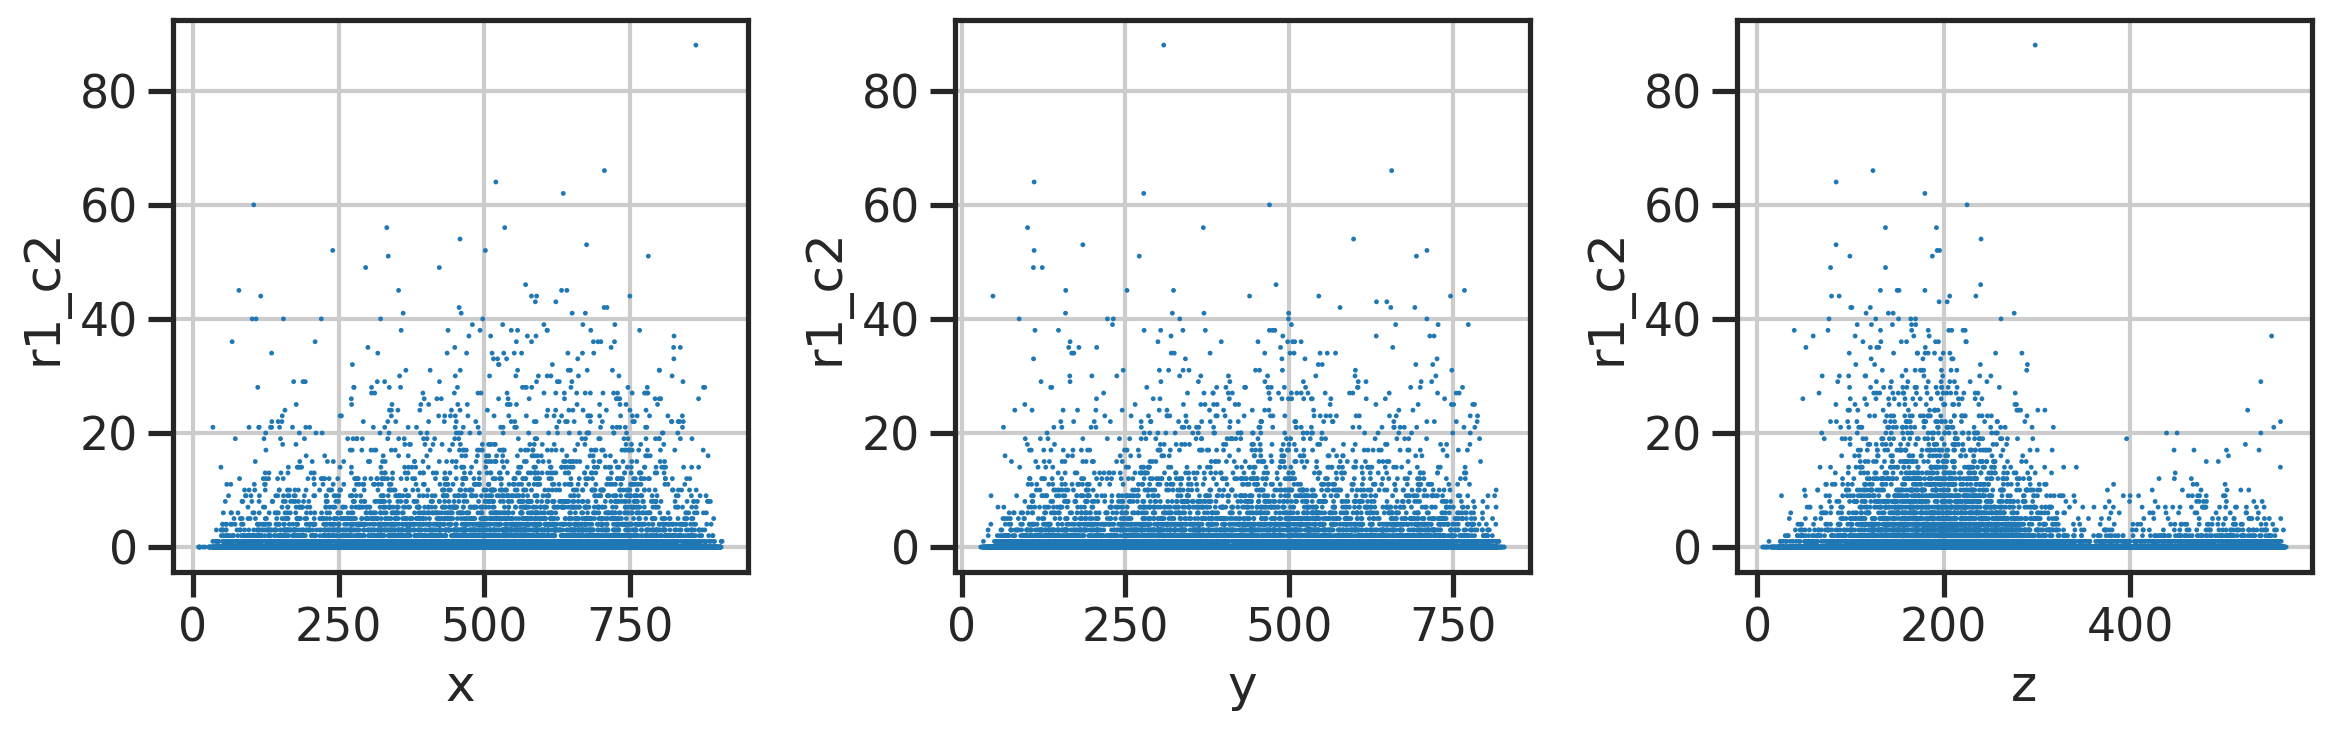

In [7]:
# cell level stats
for ch in channels: 
    fig, axs = plt.subplots(1,3,figsize=(3*4,1*4))
    ax = axs[0]
    sns.scatterplot(data=df, x='x', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('x')

    ax = axs[1]
    sns.scatterplot(data=df, x='y', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('y')

    ax = axs[2]
    sns.scatterplot(data=df, x='z', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('z')

    fig.tight_layout()
    plt.show()

In [8]:
df.describe()

z             y             x          area         r1_c0  \
count  43293.000000  43293.000000  43293.000000  43293.000000  43293.000000   
mean     303.341879    429.294340    442.826461   2152.563110      0.857737   
std      127.427637    207.171374    229.515991    765.548115      3.456975   
min        5.811050     29.197816     10.484906    505.503936      0.000000   
25%      200.893865    253.022335    245.863289   1635.244800      0.000000   
50%      297.060648    431.521473    441.363244   1970.114496      0.000000   
75%      399.637416    605.796751    639.204644   2534.629440      1.000000   
max      567.233682    828.593245    907.129236   4999.583232    181.000000   

              r1_c2  
count  43293.000000  
mean       0.646155  
std        3.161045  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       88.000000

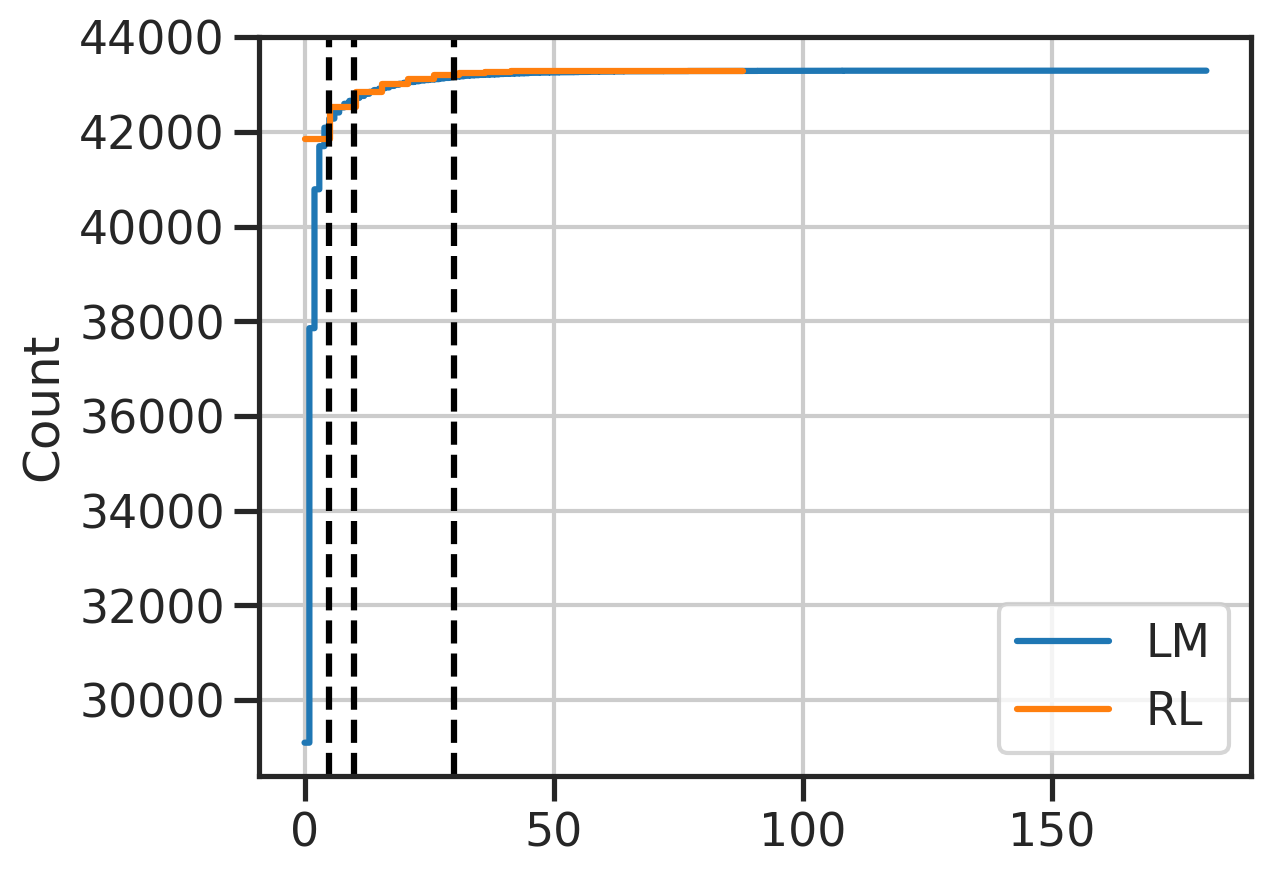

In [9]:
fig, ax = plt.subplots()
sns.histplot(df['r1_c0'].values, cumulative=True, element='step', fill=False, label='LM', ax=ax)
sns.histplot(df['r1_c2'].values, cumulative=True, element='step', fill=False, label='RL', ax=ax)
ax.axvline(5, linestyle='--', color='k')
ax.axvline(10, linestyle='--', color='k')
ax.axvline(30, linestyle='--', color='k')
ax.legend()

46.708000000005995


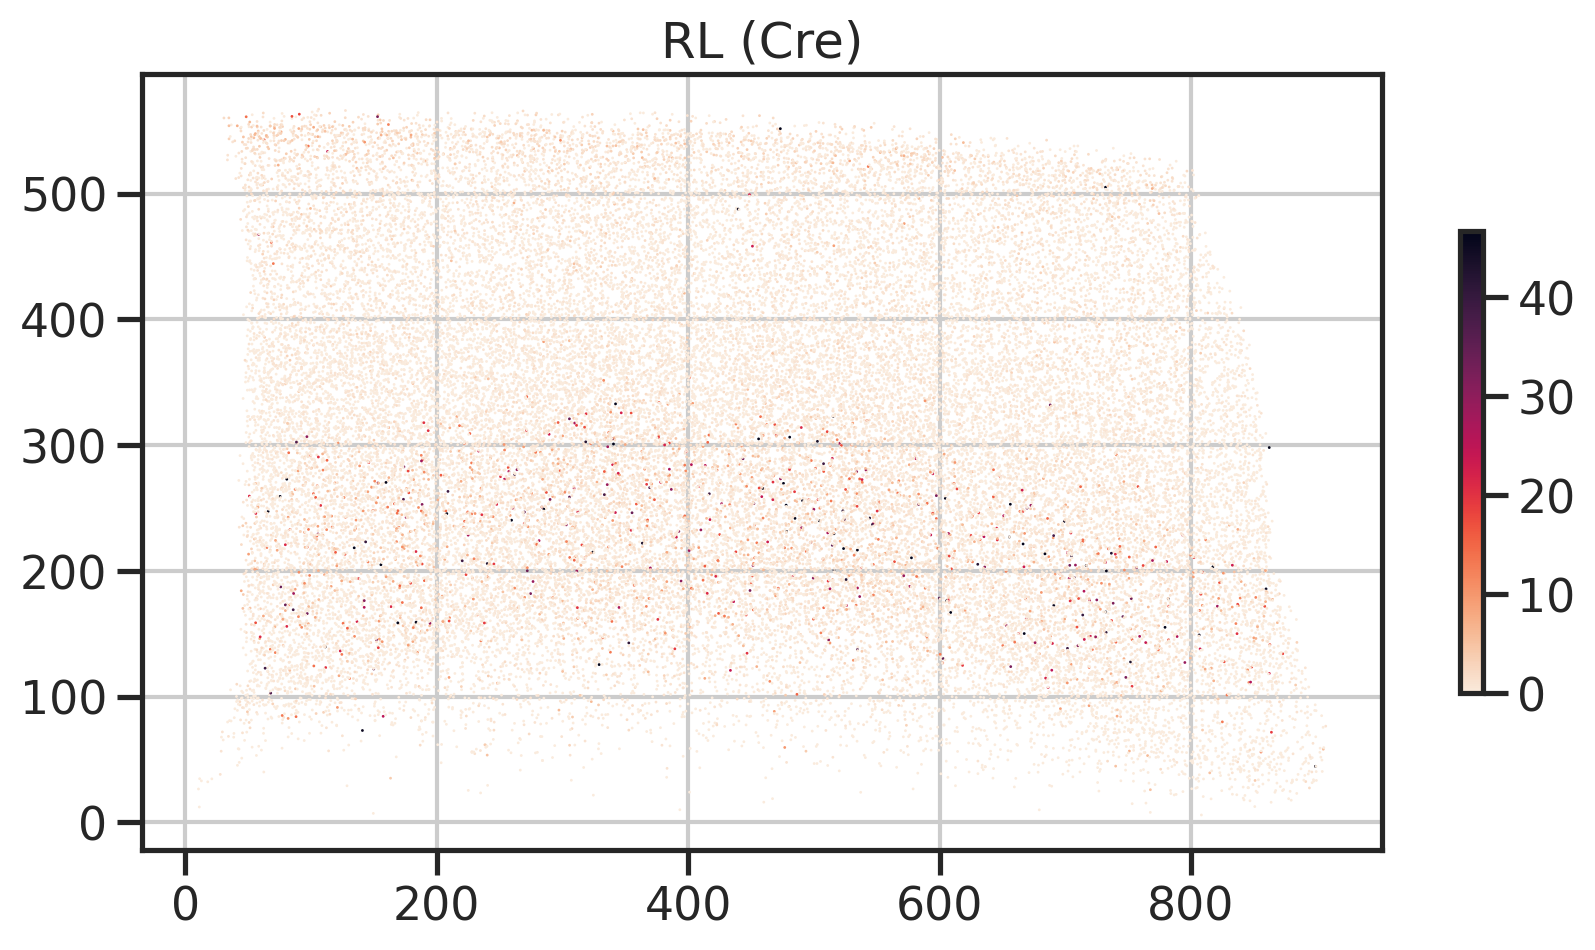

38.708000000005995


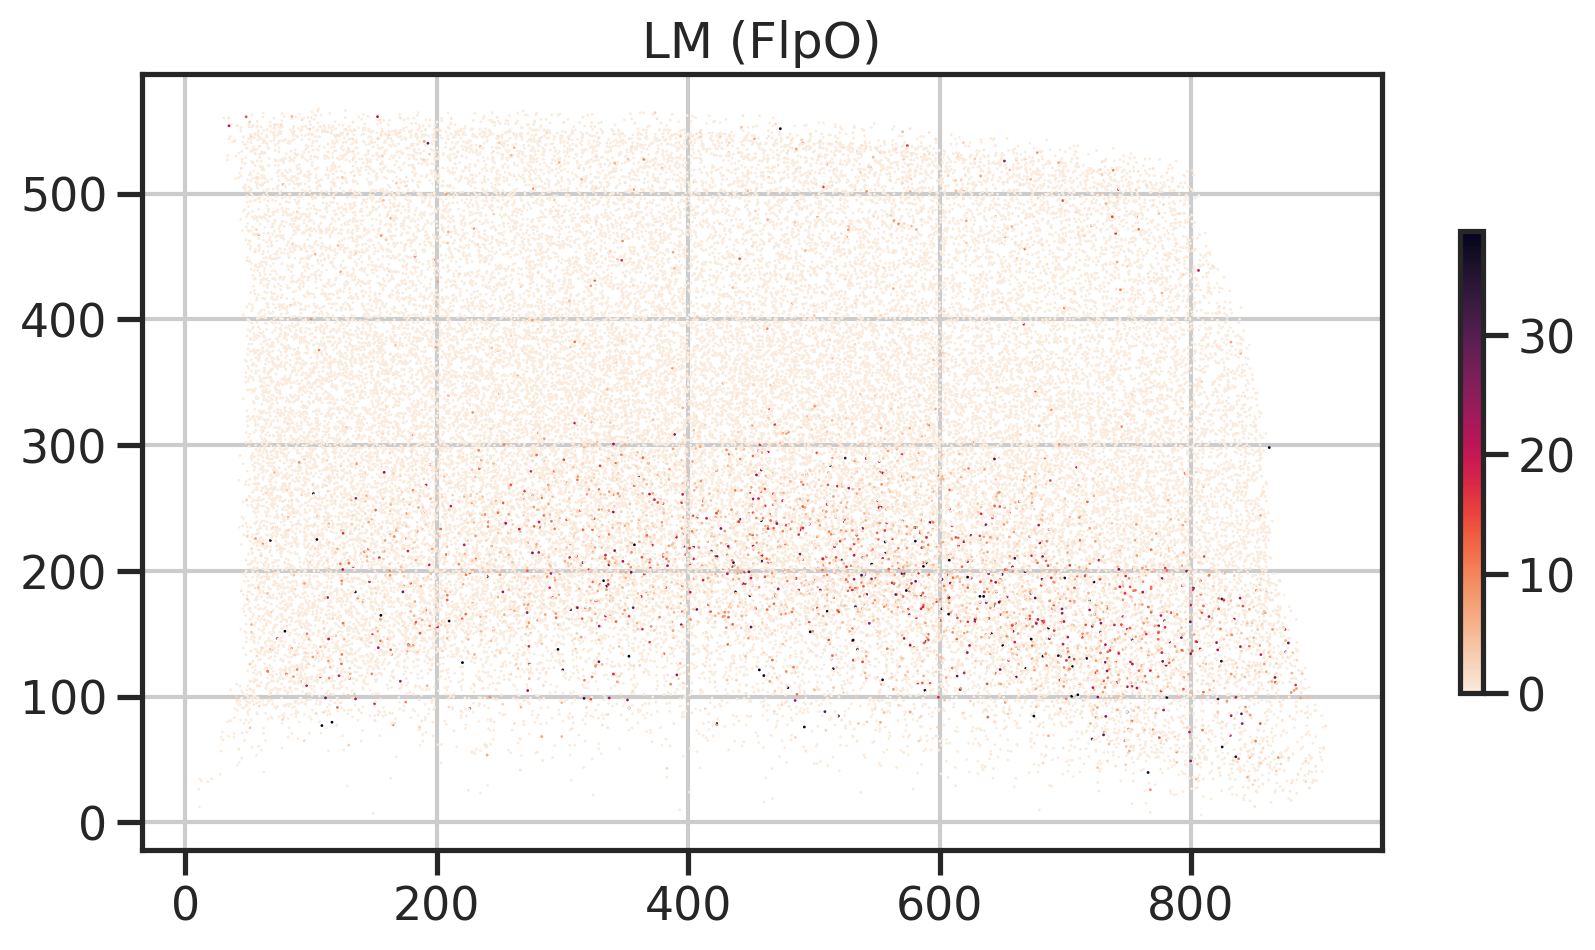

In [10]:
for ch, gene in zip(channels, genes):
    fig, ax = plt.subplots(figsize=(10,10))
    vmax = np.percentile(df[f'{ch}'], 99.9)
    print(vmax)
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}'], s=1, edgecolor='none', 
                   vmax = vmax,
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()

In [11]:
def rename(code):
    rename_dict = {
        0: 'NA', 
        1: 'RL', 
        2: 'LM', 
        3: 'both'}
    return rename_dict[code]

df = df.copy()
th_c0 = 10 
th_c2 = 5 
df['bi_r1_c0'] = df['r1_c0'] > th_c0 
df['bi_r1_c2'] = df['r1_c2'] > th_c2 
df['lbl'] = df['bi_r1_c0'].astype(int) + 2*df['bi_r1_c2'].astype(int)
df['lbl_v2'] = df['lbl'].apply(rename)
np.unique(df['lbl'].values)
np.unique(df['lbl_v2'].values)


array(['LM', 'NA', 'RL', 'both'], dtype=object)

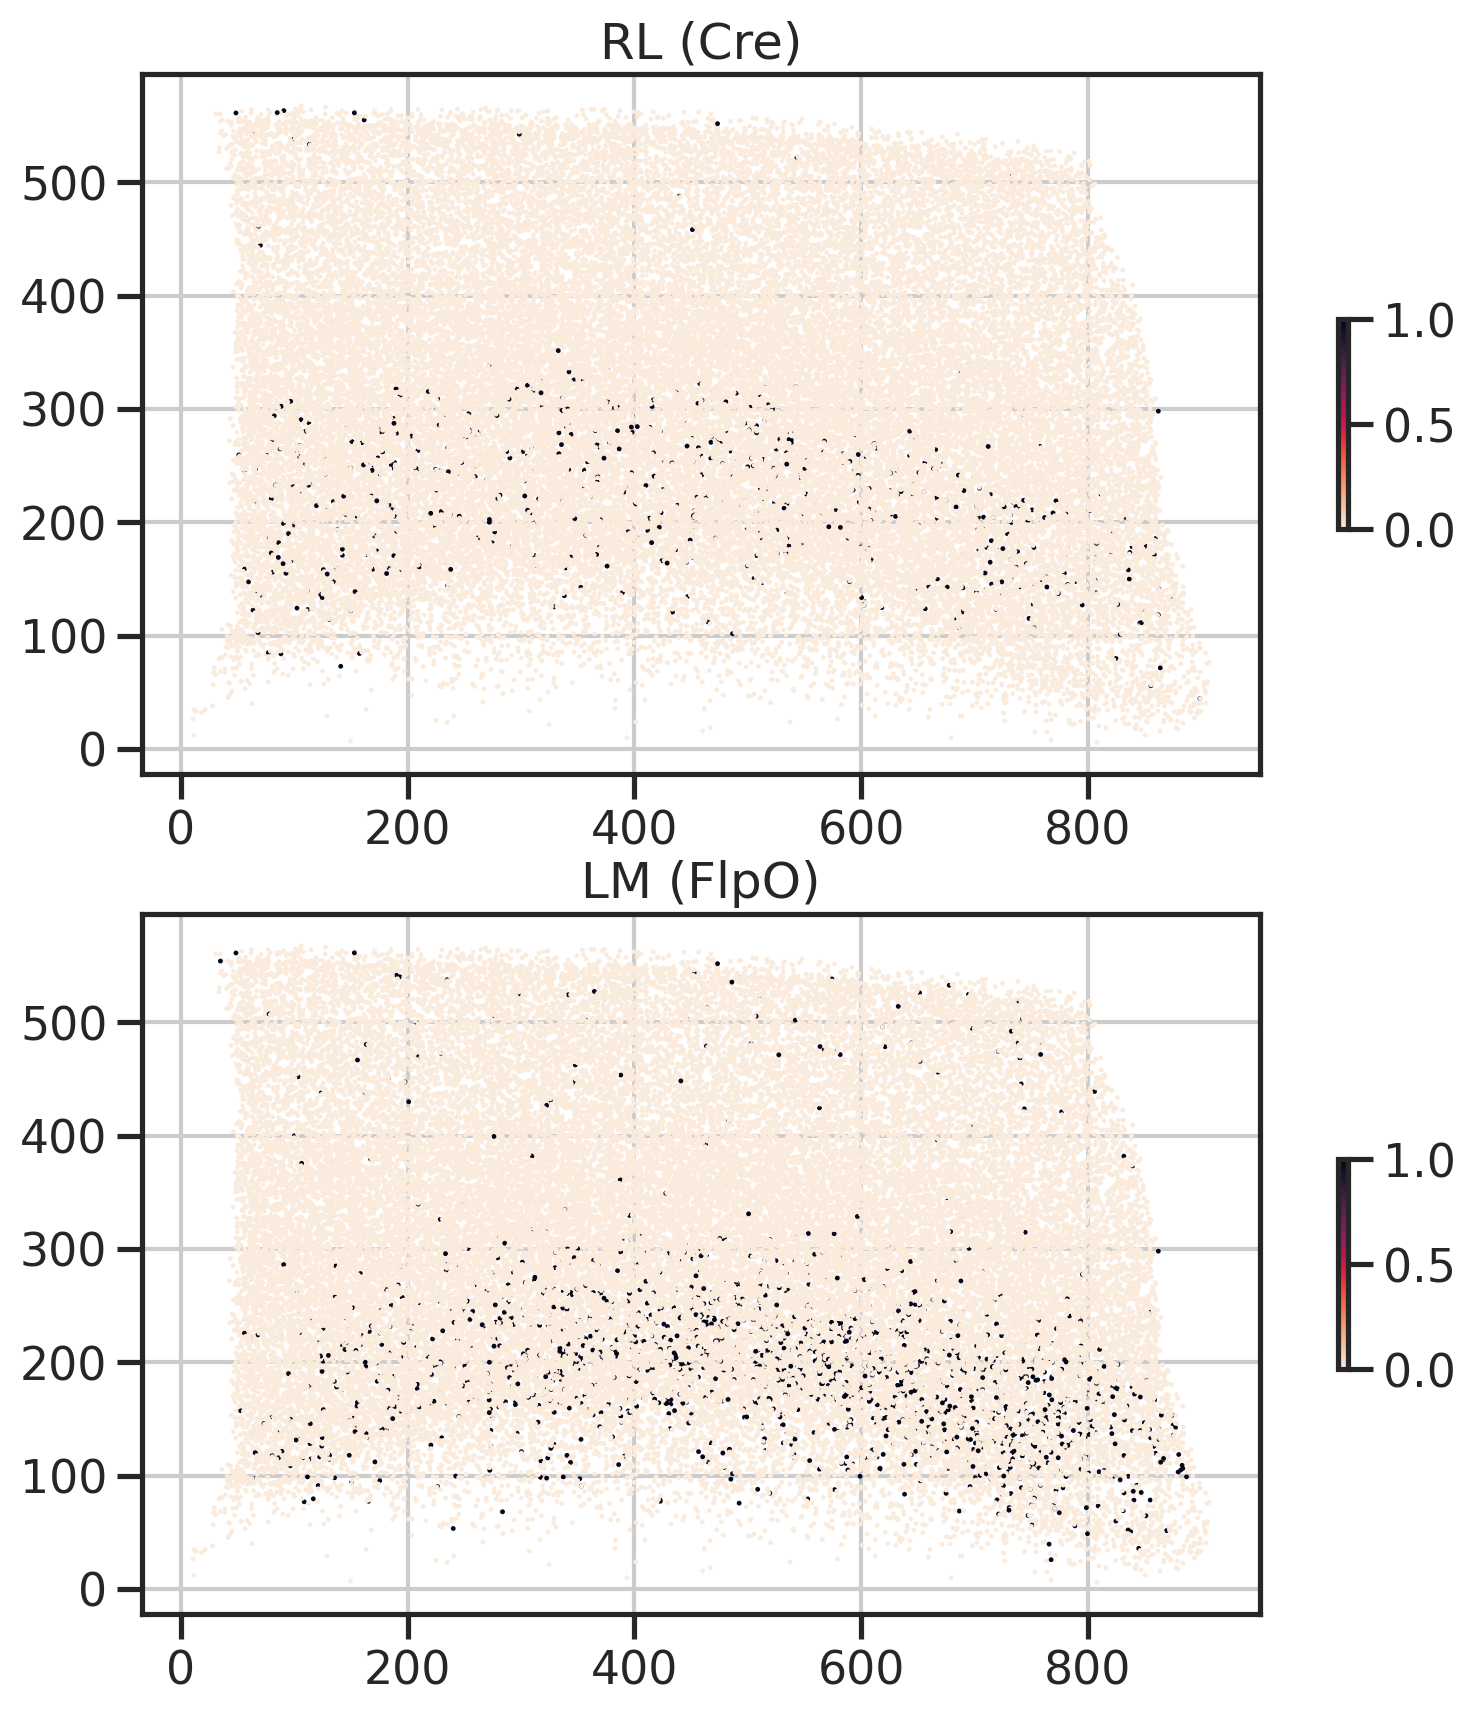

In [12]:
fig, axs = plt.subplots(2,1,figsize=(10,5*2))
for ax, ch, gene in zip(axs, channels, genes):
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'bi_{ch}'], s=3, edgecolor='none', 
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
plt.show()

In [13]:
sns.color_palette('tab10', 10)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [14]:
palette = {
    'NA': 'lightgray', 
    'LM': 'C3', 
    'RL': 'C0', 
    'both': 'C6', 
}

In [15]:
df.value_counts('lbl_v2')

lbl_v2
NA      41346
LM       1371
RL        495
both       81
dtype: int64

In [16]:
a = df.value_counts('lbl_v2')
print(a/len(df)*100, "\n")

print(f"both in LM (%): {a.loc['both']/(a.loc['both']+a.loc['LM'])*100:.1f}")
print(f"both in RL (%): {a.loc['both']/(a.loc['both']+a.loc['RL'])*100:.1f}")
print(f"RL/LM (%): {(a.loc['both']+a.loc['RL'])/(a.loc['both']+a.loc['LM'])*100:.1f}")

lbl_v2
NA      95.502737
LM       3.166794
RL       1.143372
both     0.187097
dtype: float64 

both in LM (%): 5.6
both in RL (%): 14.1
RL/LM (%): 39.7


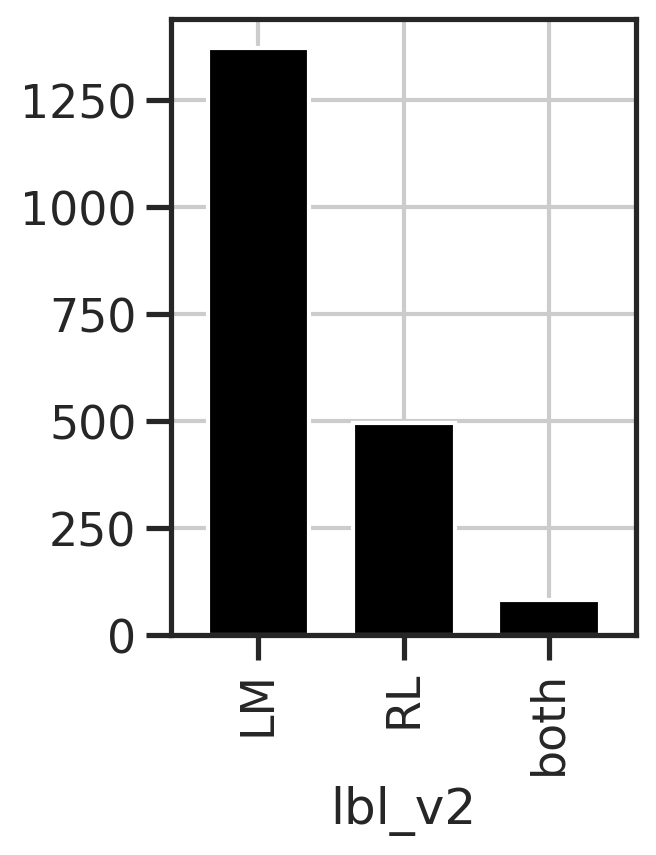

In [17]:
fig, ax = plt.subplots(figsize=(3,4))
df[df['lbl_v2']!='NA'].value_counts('lbl_v2').plot.bar(width=0.7, color='black')
plt.show()

In [18]:
def plot_easifish_proj(data, x, y, hue='lbl_v2', na_rep='NA', invert_yaxis=False, figsize=(8,8)):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df, 
                    x=x, y=y, color='lightgray', s=2, edgecolor='none')
    sns.scatterplot(data=df[df[hue]!=na_rep], 
                    x=x, y=y, hue=hue, palette=palette, s=5, edgecolor='none')
    if invert_yaxis:
        ax.invert_yaxis()
        
    ax.grid(False)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

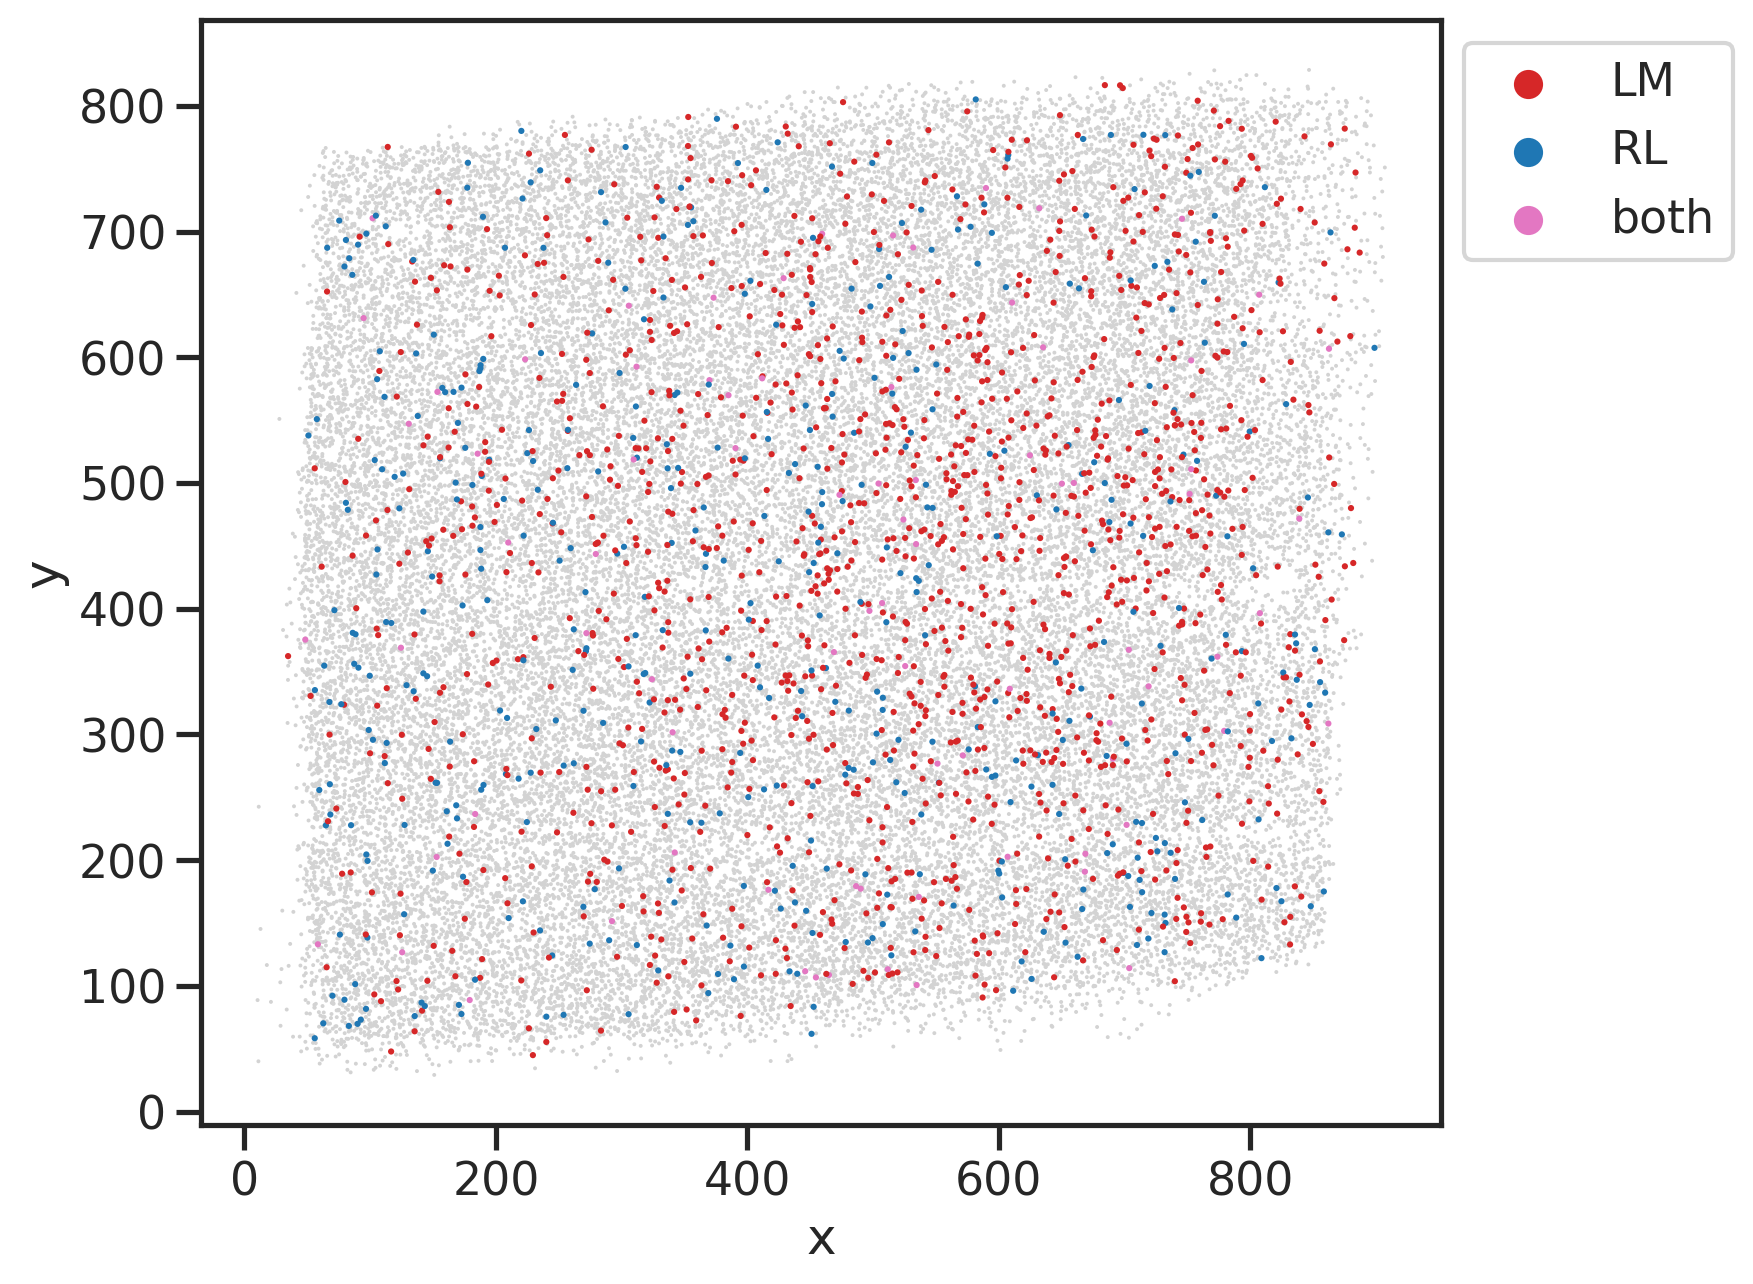

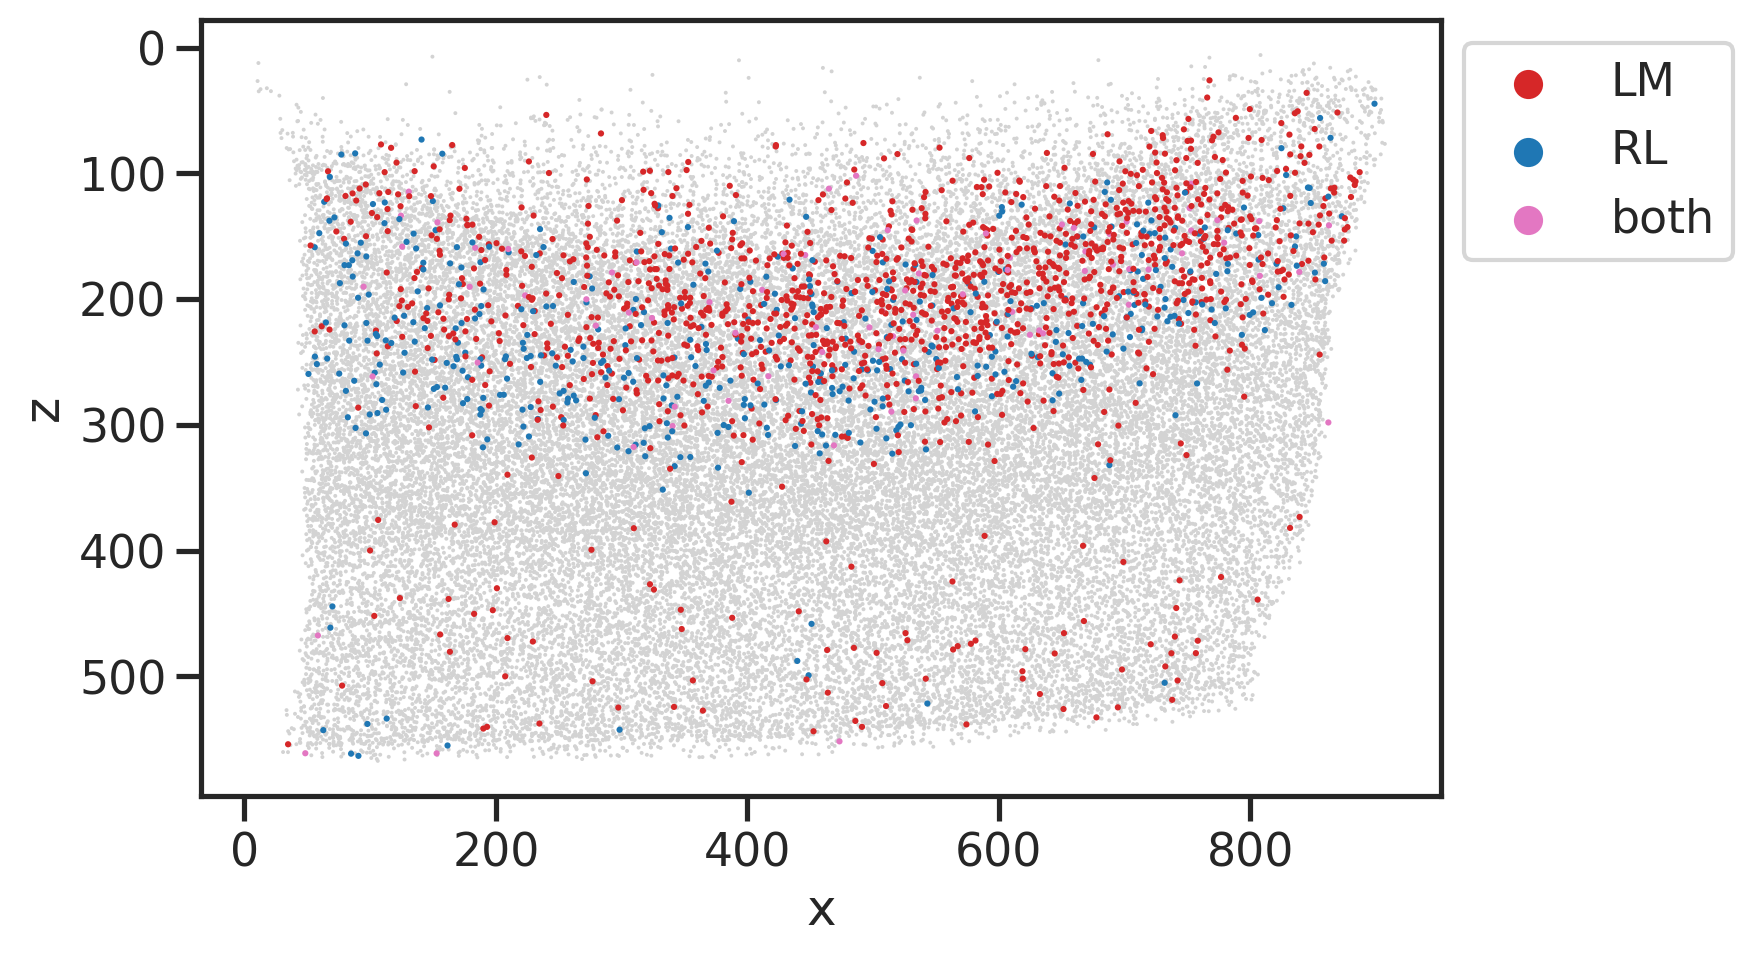

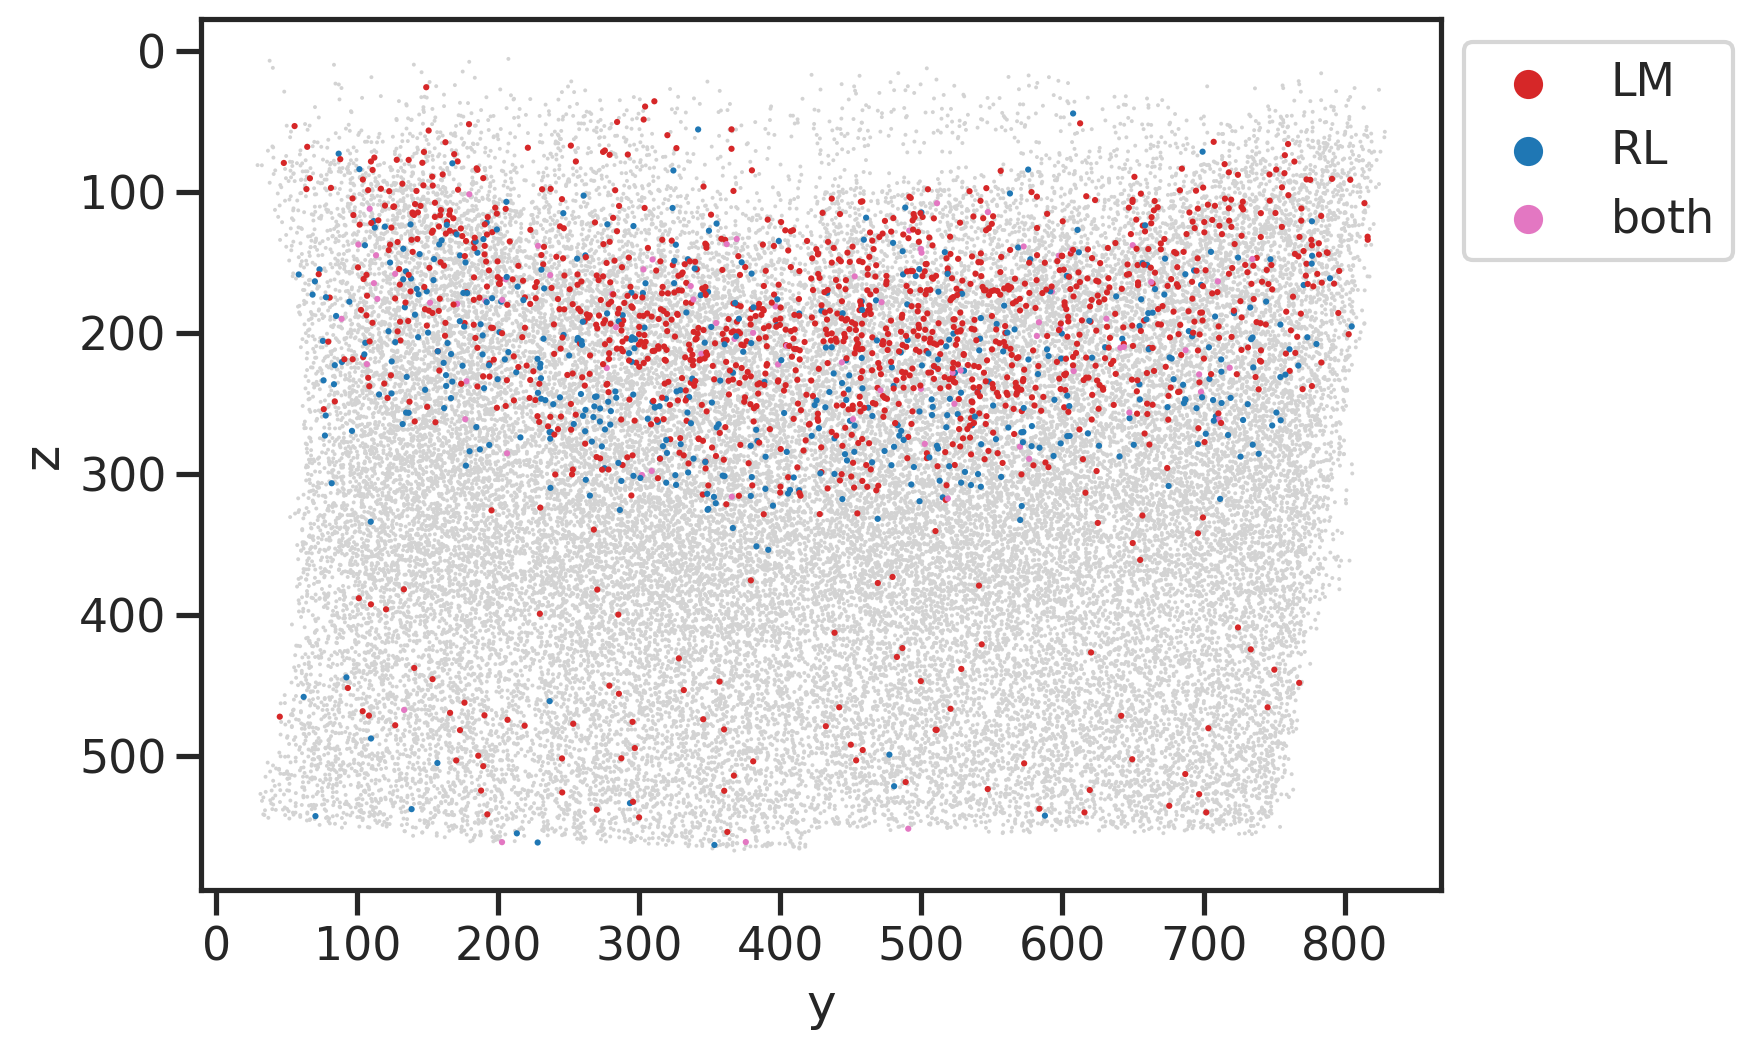

In [19]:
plot_easifish_proj(df, 'x', 'y')
plot_easifish_proj(df, 'x', 'z', invert_yaxis=True)
plot_easifish_proj(df, 'y', 'z', invert_yaxis=True)

# repeat the lt186 analysis on this

In [20]:
# fout = "/data/qlyu/v1/results_easifish/lt186_r1_labels_Jun1.csv"
# df.to_csv(fout)
# !head $fout